In [18]:
pip install tensorflow==2.4

     |█████▏                          | 28.5 MB 7.9 MB/s eta 0:00:19^C
ERROR: Exception:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/base_command.py", line 228, in _main
    status = self.run(options, args)
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/req_command.py", line 182, in wrapper
    return func(self, options, args)
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_internal/commands/install.py", line 324, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_internal/resolution/legacy/resolver.py", line 183, in resolve
    discovered_reqs.extend(self._resolve_one(requirement_set, req))
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_internal/resolution/legacy/resolver.py", line 388, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_

In [16]:
import tensorflow as tf

In [17]:
print(tf.__version__)

2.0.0


In [3]:
import os, shutil

In [4]:
original_dataset_dir = '/Users/melathaile/Documents/Models/Code/img/train'

In [5]:
os.listdir('/Users/melathaile/Documents/Models/Code/img/train')

['Urticaria Hives',
 'Seborrheic Keratoses and other Benign Tumors',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Acne and Rosacea Photos',
 '.DS_Store',
 'Vascular Tumors',
 'Eczema Photos',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Exanthems and Drug Eruptions',
 'Lupus and other Connective Tissue diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Bullous Disease Photos',
 'Nail Fungus and other Nail Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Systemic Disease',
 'Light Diseases and Disorders of Pigmentation',
 'Atopic Dermatitis Photos',
 'Warts Molluscum and other Viral Infections',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Melanoma Skin Cancer Nevi and Moles',
 'Vasculitis Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos']

In [6]:
import numpy as np
import pandas as pd

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#from tensorflow.keras.applications.vgg16 import  preprocess_input
from tensorflow.keras.applications.resnet import  preprocess_input

In [8]:
img_width, img_height = 224, 224

In [9]:
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a = preprocess_input(a)
    return a

In [10]:
res = preprocess_image("/Users/melathaile/Documents/Models/Code/img/train/Acne and Rosacea Photos/07Acne081101.jpg")
print(res)

[[[[   8.060997     4.2210007   31.32     ]
   [  15.060997     8.221001    36.32     ]
   [  18.060997     9.221001    37.32     ]
   ...
   [   2.060997    -3.7789993   28.32     ]
   [   5.060997    -0.7789993   31.32     ]
   [   4.060997    -1.7789993   30.32     ]]

  [[  15.060997    11.221001    38.32     ]
   [  18.060997    11.221001    39.32     ]
   [  20.060997    11.221001    39.32     ]
   ...
   [ -13.939003   -19.779       12.32     ]
   [   9.060997     1.2210007   33.32     ]
   [  17.060997    10.221001    40.32     ]]

  [[  13.060997     9.221001    36.32     ]
   [  13.060997     6.2210007   34.32     ]
   [  17.060997     8.221001    36.32     ]
   ...
   [  19.060997    11.221001    43.32     ]
   [  22.060997    12.221001    43.32     ]
   [   7.060997    -2.7789993   28.32     ]]

  ...

  [[   7.060997     3.2210007   33.32     ]
   [   8.060997     4.2210007   31.32     ]
   [  21.060997    13.221001    39.32     ]
   ...
   [-100.939     -110.779     -113.

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# HEIGHT = 224
# WIDTH = 224

# base_model = ResNet50(weights='imagenet', 
#                       include_top=False, 
#                       input_shape=(HEIGHT, WIDTH, 3))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = "/Users/melathaile/Documents/Models/Code/img/train"
HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 8

train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )

train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    shuffle = False,
                                                    batch_size=BATCH_SIZE)


test_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )
validation_generator = test_datagen.flow_from_directory(
        '/Users/melathaile/Documents/Models/Code/img/test',
        target_size=(224, 224),
        shuffle = False,
        batch_size=BATCH_SIZE)

val_generator = test_datagen.flow_from_directory(
        '/Users/melathaile/Documents/Models/Code/img/test',
        target_size=(224, 224),
        shuffle = False,
        batch_size=BATCH_SIZE)

<h1> ResNet-50 </h1>
<hr>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [1]:
resnet50 = tf.keras.models.load_model('resnet50.h5')
# inceptionv3 = tf.keras.models.load_model('inception-v3.h5')
efficientNet = tf.keras.models.load_model('efficientNet.h5')
vgg19 = tf.keras.models.load_model('vgg19.h5')
# testing = model.evaluate(val_generator)


NameError: name 'tf' is not defined

In [ ]:
Y_pred = resnet50.predict(val_generator, verbose = 1)

In [ ]:
testing = resnet50.evaluate(val_generator)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
target_names = ['Urticaria Hives', 'Seborrheic Keratoses and other Benign Tumors', 'Poison Ivy Photos and other Contact Dermatitis', 'Acne and Rosacea Photos', 'Vascular Tumors', 'Eczema Photos', 'Psoriasis pictures Lichen Planus and related diseases', 'Exanthems and Drug Eruptions', 'Lupus and other Connective Tissue diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Bullous Disease Photos', 'Nail Fungus and other Nail Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Systemic Disease', 'Light Diseases and Disorders of Pigmentation', 'Atopic Dermatitis Photos', 'Warts Molluscum and other Viral Infections', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Melanoma Skin Cancer Nevi and Moles', 'Vasculitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos']
matrix = confusion_matrix(validation_generator.classes, y_pred)
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Urticaria Hives', 'Seborrheic Keratoses and other Benign Tumors', 'Poison Ivy Photos and other Contact Dermatitis', 'Acne and Rosacea Photos', 'Vascular Tumors', 'Eczema Photos', 'Psoriasis pictures Lichen Planus and related diseases', 'Exanthems and Drug Eruptions', 'Lupus and other Connective Tissue diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Bullous Disease Photos', 'Nail Fungus and other Nail Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Systemic Disease', 'Light Diseases and Disorders of Pigmentation', 'Atopic Dermatitis Photos', 'Warts Molluscum and other Viral Infections', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Melanoma Skin Cancer Nevi and Moles', 'Vasculitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

NameError: name 'Y_pred' is not defined

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
fig.colorbar(cax)
plt.title('Confusion matrix of the classifier')

<h2> Black and White Skin disease comparison </h2>
<p>resnet50 = tf.keras.models.load_model('resnet50.h5')</p>
<p>inceptionv3 = tf.keras.models.load_model('inception-v3.h5')</p>
<p>efficientNet = tf.keras.models.load_model('efficientNet.h5')</p>
<p>vgg19 = tf.keras.models.load_model('vgg19.h5')</p>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


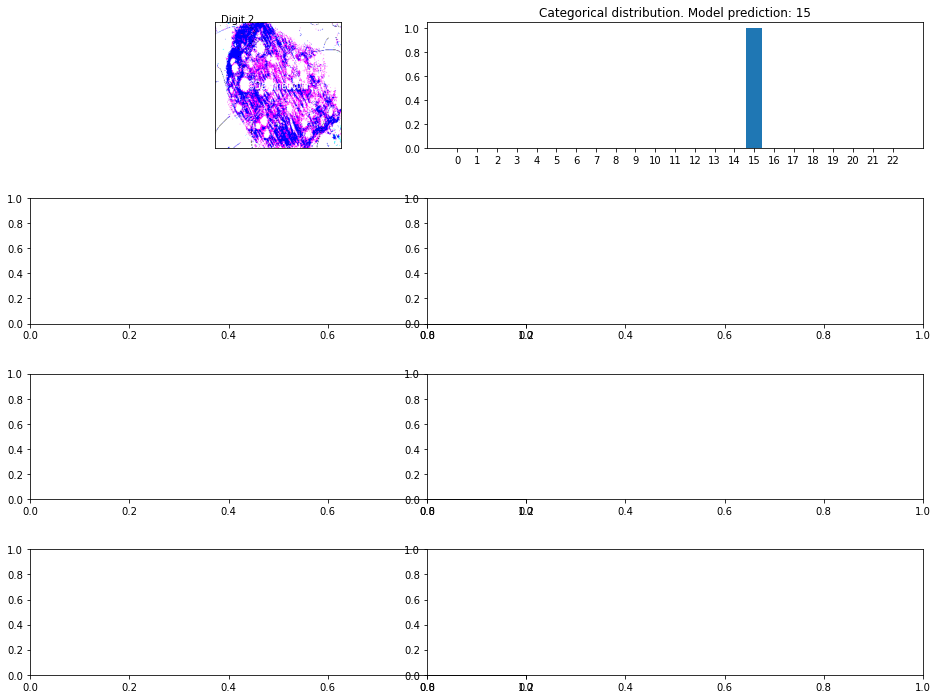

In [160]:
# Run this cell to get model predictions on randomly selected test images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# num_test_images = scaled_test_images.shape[0]

# random_inx = np.random.choice(num_test_images, 4)
# random_test_images = scaled_test_images[random_inx, ...]
res = preprocess_image("/Users/melathaile/Desktop/pictures/1.jpg")
random_test_labels = '2'


img = mpimg.imread('/Users/melathaile/Desktop/pictures/pic/bullous-pemphigoid-2.jpg')
predictions = modelIncRes.predict(res)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(res))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

AttributeError: 'Model' object has no attribute 'history'

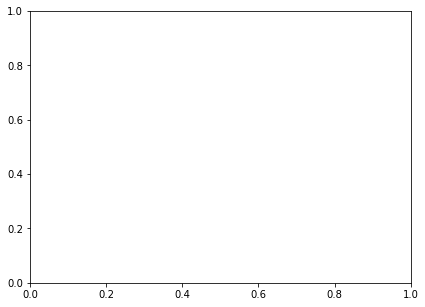

In [149]:
plt.figure(figsize=(15,5))
plt.subplot(121)
try:
    plt.plot(modelRes.history['accuracy'])
    plt.plot(modelRes.history['val_accuracy'])
except KeyError:
    plt.plot(modelRes.history['acc'])
    plt.plot(modelRes.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(122)
plt.plot(modelRes.history['loss'])
plt.plot(modelRes.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [151]:
modelRes.history()

AttributeError: 'Model' object has no attribute 'history'

In [93]:
target_names = ['Urticaria Hives', 'Seborrheic Keratoses and other Benign Tumors', 'Poison Ivy Photos and other Contact Dermatitis', 'Acne and Rosacea Photos', 'Vascular Tumors', 'Eczema Photos', 'Psoriasis pictures Lichen Planus and related diseases', 'Exanthems and Drug Eruptions', 'Lupus and other Connective Tissue diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Bullous Disease Photos', 'Nail Fungus and other Nail Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Systemic Disease', 'Light Diseases and Disorders of Pigmentation', 'Atopic Dermatitis Photos', 'Warts Molluscum and other Viral Infections', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Melanoma Skin Cancer Nevi and Moles', 'Vasculitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos']

print(target_names[12])

Tinea Ringworm Candidiasis and other Fungal Infections


In [39]:
# Run this cell to get model predictions on randomly selected test images

# num_test_images = scaled_test_images.shape[0]

# random_inx = np.random.choice(num_test_images, 4)
random_test_images = validation_generator[0]
random_test_labels = validation_generator.classes[0]




predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

TypeError: expected str, bytes or os.PathLike object, not tuple

In [38]:
print(validation_generator[0])

(array([[[[   4.3837585 ,   -8.676697  ,   38.863213  ],
         [  10.54583   ,   -2.2941666 ,   44.804832  ],
         [  15.317055  ,    3.2210007 ,   50.32      ],
         ...,
         [   8.060997  ,   -1.2931595 ,   29.643898  ],
         [   8.060997  ,    0.5218811 ,   30.85392   ],
         [   8.432968  ,    2.336914  ,   32.43592   ]],

        [[   8.013832  ,   -5.651634  ,   43.098305  ],
         [   3.236534  ,   -9.632721  ,   37.524788  ],
         [  13.031479  ,    0.19148254,   47.290474  ],
         ...,
         [   8.060997  ,    1.0954895 ,   31.23632   ],
         [   8.624176  ,    2.91053   ,   33.00953   ],
         [   7.8836746 ,    3.0436783 ,   33.142677  ]],

        [[  12.935356  ,   -0.9046402 ,   48.19436   ],
         [   6.8666077 ,   -6.6076584 ,   41.75988   ],
         [   5.166321  ,   -7.6736755 ,   39.425316  ],
         ...,
         [   8.815376  ,    3.4841385 ,   33.583138  ],
         [   6.54525   ,    1.7052536 ,   31.804253  ],
 

In [114]:
pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
Note: you may need to restart the kernel to use updated packages.


In [113]:
# read the image

import tensorflow as tf
# import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/Users/melathaile/Documents/Models/Code/img/test/Atopic Dermatitis Photos/03DermatitisAreola45.jpg')

# format it to be in the RGB colorspace
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# resize to 300x300 and normalize pixel values to be in the range [0, 1]
img = cv2.resize(img, (224, 224)) / 255.0

# add a batch dimension in front
image = np.expand_dims(img, axis=0)

ModuleNotFoundError: No module named 'cv2'

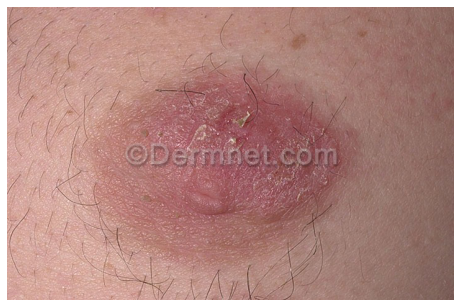

In [116]:
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [117]:
# Siberian Husky's class ID in ImageNet
class_index = 251   

# If you downloaded the cat, use this line instead
#class_index = 282   # Tabby Cat in ImageNet

# number of classes in the model's training data
num_classes = 1001

# convert to one hot representation to match our softmax activation in the model definition
expected_output = tf.one_hot([class_index] * image.shape[0], num_classes)

with tf.GradientTape() as tape:
    # cast image to float
    inputs = tf.cast(image, tf.float32)

    # watch the input pixels
    tape.watch(inputs)

    # generate the predictions
    predictions = model(inputs)

    # get the loss
    loss = tf.keras.losses.categorical_crossentropy(
        expected_output, predictions
    )

# get the gradient with respect to the inputs
gradients = tape.gradient(loss, inputs)

InvalidArgumentError: Incompatible shapes: [8,1001] vs. [8,23] [Op:Mul] name: mul/

In [118]:
# reduce the RGB image to grayscale
grayscale_tensor = tf.reduce_sum(tf.abs(gradients), axis=-1)

# normalize the pixel values to be in the range [0, 255].
# the max value in the grayscale tensor will be pushed to 255.
# the min value will be pushed to 0.
normalized_tensor = tf.cast(
    255
    * (grayscale_tensor - tf.reduce_min(grayscale_tensor))
    / (tf.reduce_max(grayscale_tensor) - tf.reduce_min(grayscale_tensor)),
    tf.uint8,
)

# remove the channel dimension to make the tensor a 2d tensor
normalized_tensor = tf.squeeze(normalized_tensor)

NotFoundError: Could not find valid device for node.
Node:{{node Abs}}
All kernels registered for op Abs :
  device='CPU'; T in [DT_FLOAT]
  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_DOUBLE]
  device='CPU'; T in [DT_INT32]
  device='CPU'; T in [DT_INT64]
 [Op:Abs] name: Abs/

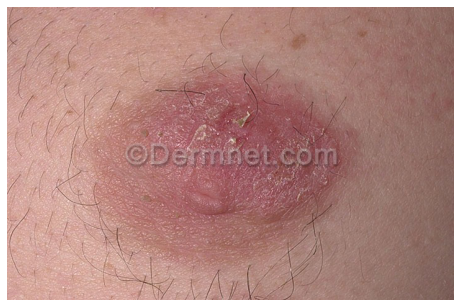

In [119]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

In [124]:
pip install opencv-python

     |████████████████████████████████| 43.6 MB 3.0 MB/s eta 0:00:013     |████████████████▌               | 22.6 MB 1.5 MB/s eta 0:00:15
Note: you may need to restart the kernel to use updated packages.


In [125]:
import cv2

In [128]:
gradient_color = cv2.applyColorMap(img.numpy(), cv2.COLORMAP_HOT)
gradient_color = gradient_color / 255.0
super_imposed = cv2.addWeighted(img, 0.5, gradient_color, 0.5, 0.0)

plt.figure(figsize=(8, 8))
plt.imshow(super_imposed)
plt.axis('off')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'